### Data-driven prediction of energy use of appliances 
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. 

Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters). 

DateTime, year-month-day hour:minute:second \
Appliances, energy use in Wh (Dependent variable) \
Lights, energy use of light fixtures in the house in Wh (Drop this column) \
T1, Temperature in kitchen area, in Celsius \
RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius \
RH2, Humidity in living room area, in % \
T3, Temperature in laundry room area \
RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius \ 
RH4, Humidity in office room, in % \
T5, Temperature in bathroom, in Celsius \
RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius \
RH6, Humidity outside the building (north side), in % \
T7, Temperature in ironing room , in Celsius \
RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius \
RH8, Humidity in teenager room 2, in % \
T9, Temperature in parents room, in Celsius \
RH9, Humidity in parents room, in % To, 
T_out, Temperature outside (from Chievres weather station), in
Celsius \ 
Pressure (from Chievres weather station), in mm Hg RHout, \
Humidity outside (fromChievres weather station), in % \
Wind speed (from Chievres weather station), in m/s \
Visibility (from Chievres weather station), in km \
Tdewpoint (from Chievres weather station), Â°C \
rv1, Random variable 1, nondimensional \
rv2, Random variable 2, nondimensional \

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

### Problem Statement
1. Briefly describe the dataset?
2. Plot the distribution graph for all phyiscal features and define the statistics?
3. Analyze the weather condition for the region and mention seasons with months.
4. Analyze the energy consumption w.r.t. humidity, temp., pressure, visibility one by one.
5. Which days of week will require more power supply?
6. How much power supply will be needed for different phase of a normal day?
7. Describe appliance use per house per day with seasons.
8. Apply Machine Learning algorithm and find the best model that fits the dataset. 
9. Apply cross-validation techniques and does hyperparameter tuning to improve the model.
10. Perform some predictions with input values(physical and temporal feautres) and compare with available output values(Appliance use). Finally deploy the model.


# Step 1: Importing modules and dataset

In [2]:
# Data visualization and analysis modules
import pandas as pd
pd.set_option("display.max_columns", None)  # Display all columns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Appliance energy dataset
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Appliance Energy Prediction/KAG_energydata_complete.csv')

In [5]:
print('Dataset Overview')
df1

Dataset Overview


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [6]:
df1.size

572315

# Step 2: Understanding the dataset

In [7]:
df1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
# Renaming the short form column names to the long form 
df_final = df1.rename(columns={'date':'DateTime','Appliances':'Appliances(Wh)','lights':'Lights(Wh)','T1':'Kitchen_temp', 'RH_1':'Kitchen_humidity', 'T2':'Liv_room_temp', 'RH_2':'Liv_room_humidity', 'T3':'Laundary_room_temp.',
       'RH_3':'Laundary_room_humidity', 'T4':'Office_room_temp', 'RH_4':'Office_room_humd', 'T5':'bathroom_temp', 'RH_5':'bathroom_humd', 'T6':'Outside_build_temp', 'RH_6':'Outside_build_humd', 'T7':'iron_room_temp', 'RH_7':'iron_room_humd', 'T8':'teen_room_temp',
       'RH_8':'teen_room_humd', 'T9':'parent_room_temp', 'RH_9':'parent_room_humd'})

In [9]:
df_final.head()

,DateTime,Appliances(Wh),Lights(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
df_final.tail()

,DateTime,Appliances(Wh),Lights(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [11]:
print('Columns')
df_final.columns

Columns


Index(['DateTime', 'Appliances(Wh)', 'Lights(Wh)', 'Kitchen_temp',
       'Kitchen_humidity', 'Liv_room_temp', 'Liv_room_humidity',
       'Laundary_room_temp.', 'Laundary_room_humidity', 'Office_room_temp',
       'Office_room_humd', 'bathroom_temp', 'bathroom_humd',
       'Outside_build_temp', 'Outside_build_humd', 'iron_room_temp',
       'iron_room_humd', 'teen_room_temp', 'teen_room_humd',
       'parent_room_temp', 'parent_room_humd', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [12]:
df_final.isnull().sum()   # there is no null value

DateTime                  0
Appliances(Wh)            0
Lights(Wh)                0
Kitchen_temp              0
Kitchen_humidity          0
Liv_room_temp             0
Liv_room_humidity         0
Laundary_room_temp.       0
Laundary_room_humidity    0
Office_room_temp          0
Office_room_humd          0
bathroom_temp             0
bathroom_humd             0
Outside_build_temp        0
Outside_build_humd        0
iron_room_temp            0
iron_room_humd            0
teen_room_temp            0
teen_room_humd            0
parent_room_temp          0
parent_room_humd          0
T_out                     0
Press_mm_hg               0
RH_out                    0
Windspeed                 0
Visibility                0
Tdewpoint                 0
rv1                       0
rv2                       0
dtype: int64

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                19735 non-null  object 
 1   Appliances(Wh)          19735 non-null  int64  
 2   Lights(Wh)              19735 non-null  int64  
 3   Kitchen_temp            19735 non-null  float64
 4   Kitchen_humidity        19735 non-null  float64
 5   Liv_room_temp           19735 non-null  float64
 6   Liv_room_humidity       19735 non-null  float64
 7   Laundary_room_temp.     19735 non-null  float64
 8   Laundary_room_humidity  19735 non-null  float64
 9   Office_room_temp        19735 non-null  float64
 10  Office_room_humd        19735 non-null  float64
 11  bathroom_temp           19735 non-null  float64
 12  bathroom_humd           19735 non-null  float64
 13  Outside_build_temp      19735 non-null  float64
 14  Outside_build_humd      19735 non-null

### Problem 1: Briefly describe the dataset?

In [14]:
df_final.describe()

,Appliances(Wh),Lights(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


1. There is one object(string) column, 28 numerical columns and no categorial columns.
2. There is no null value in the dataset.
3. There are 2 dependent columns(appliances and lights), and all other are independent columns.
4. Basically we are provided with 5 physical quantities: temp., pressure, windspeed, humidity and visibility.
5. Each row of the dataset tells how many appliances and lights are in use as per the variation of the physical quantities for a housing colony in 5 months cycle.
6. Appliance energy range: 10 to 1080 Wh \
   Lights energy range: 0 to 70 Wh \
   Indoor temp. range: 15 to 29 degree celsius \
   Outdoor temp. range: -5 to 28 degree celsius \
   Indoor humidity range: 20% to 96% \
   Outdoor humidity range: 1% to 99.9% \
   Pressure: 729 to 772 mm of HG \

Note: Wh is Watt-Hour which means 1 watt or 1 joule per second energy consumed for 1 hour.   

#### Actions required: 
1. DateTime is in string format. Needed to change into datetime formate to extract year, month, weekdays and time. And finally drop DatTime.
2. For now we have no idea of rv1 and rv2. So, drop it for now.
3. We only have to forcast for appliances. So, drop lights.

# Step 3: Data Extraction and Cleaning

In [15]:
# Let's first drop light column
df_final.drop(['Lights(Wh)'], axis=1, inplace=True)

# Convert datetime string into datetime format
df_final['DateTime'] = pd.to_datetime(df_final['DateTime'])
df_final['Date'] = df_final['DateTime'].dt.date

# Adding more precised datetime columns
df_final['month'] = df_final['DateTime'].dt.month
df_final['weekday'] = df_final['DateTime'].dt.weekday
df_final['time'] = df_final['DateTime'].dt.time
df_final['hour'] = df_final['DateTime'].dt.hour

In [16]:
df_final['time'] = df_final['time'].astype(str)
df_final['DateTime'] = df_final['DateTime'].astype(str)
df_final['Date'] = df_final['Date'].astype(str)


In [17]:
conditions = [
    (df_final['hour']>=17) & (df_final['hour']<20),
    (df_final['hour']>=20) & (df_final['hour']<24),
    (df_final['hour']>=0) & (df_final['hour']<3),
    (df_final['hour']>=3) & (df_final['hour']<7),
    (df_final['hour']>=7) & (df_final['hour']<11),
    (df_final['hour']>=11) & (df_final['hour']<17),
]
values = ['Evening','Night','Late Night','Early Morning','Morning','Afternoon']
df_final['shift'] = np.select(conditions, values)

In [18]:
# Removing non-relevent columns
df_final.drop(['rv1','rv2'], axis=1, inplace=True)

In [19]:
print(list(df_final.columns))
len(list(df_final.columns))

['DateTime', 'Appliances(Wh)', 'Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp', 'Liv_room_humidity', 'Laundary_room_temp.', 'Laundary_room_humidity', 'Office_room_temp', 'Office_room_humd', 'bathroom_temp', 'bathroom_humd', 'Outside_build_temp', 'Outside_build_humd', 'iron_room_temp', 'iron_room_humd', 'teen_room_temp', 'teen_room_humd', 'parent_room_temp', 'parent_room_humd', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Date', 'month', 'weekday', 'time', 'hour', 'shift']


32

### Deciding important columns
Task: Considering the most important columns and droping the rest.

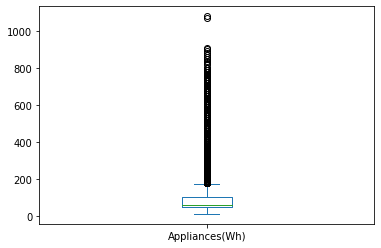

In [20]:
df_final['Appliances(Wh)'].plot.box()

In [21]:
df_corr = df_final.corr()
df_corr

,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,weekday,hour
Appliances(Wh),1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011606,0.003060,0.216792
Kitchen_temp,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,0.706305,0.001381,0.178858
Kitchen_humidity,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.094048,-0.053782,0.018594
Liv_room_temp,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,0.533479,0.000602,0.254784
Liv_room_humidity,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,-0.097914,-0.044249,-0.183322
Laundary_room_temp.,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,0.790365,-0.017514,0.037624
Laundary_room_humidity,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.414359,-0.035182,-0.052392
Office_room_temp,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,0.789168,-0.091006,0.088407
Office_room_humd,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.258167,-0.005749,-0.019068
bathroom_temp,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,0.785865,-0.040827,0.071340


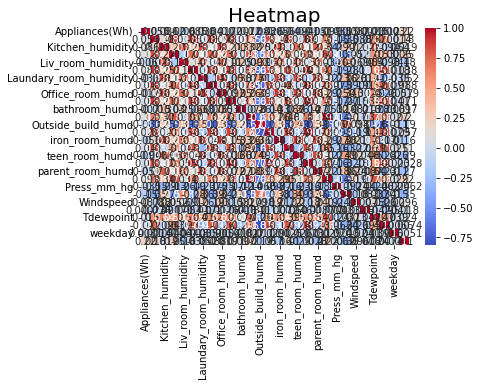

In [22]:
sns.heatmap(df_final.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap', fontsize=20)
plt.rcParams['figure.figsize'] = (15,18)
plt.show()

In [23]:
# Appliance correlation to all
imp = df_corr[0:1]
imp

,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,weekday,hour
Appliances(Wh),1.0,0.055447,0.086031,0.120073,-0.060465,0.08506,0.036292,0.040281,0.016965,0.01976,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.01001,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.00023,0.015353,-0.011606,0.00306,0.216792


### Observations:
1. Appliance has high positive relation with: Liv_room_temp, Outside_build_temp, T_out, Windspeed and hour.
2. Appliance has high negative relation with: RH_out, Outside_build_humd, Liv_room_humidity and teen_room_humd.


In [24]:
# Extracting important columns
# Creating list for higher correlation values for important columns
col_value = [col for col in imp.iloc[0,:]]
pos_values = [val for val in col_value if val>=0.04 and val<=1]
neg_values = [val2 for val2 in col_value if val2<0 and val2<=(-0.05)]

# Creating the final column for our new database
pos_col = [col for col in imp.columns if imp.loc[:,[col]].iat[0,0] in pos_values]
neg_col = [col2 for col2 in imp.columns if imp.loc[:,[col2]].iat[0,0] in neg_values]
final_imp_col = pos_col + neg_col
print('Final Extracted Columns')
final_imp_col

Final Extracted Columns


['Appliances(Wh)',
 'Kitchen_temp',
 'Kitchen_humidity',
 'Liv_room_temp',
 'Laundary_room_temp.',
 'Office_room_temp',
 'Outside_build_temp',
 'T_out',
 'Windspeed',
 'hour',
 'Liv_room_humidity',
 'Outside_build_humd',
 'iron_room_humd',
 'teen_room_humd',
 'parent_room_humd',
 'RH_out']

In [25]:
# New database
df_final2 = df_final.loc[:,final_imp_col]

Text(0.5, 1.0, 'Heatmap')

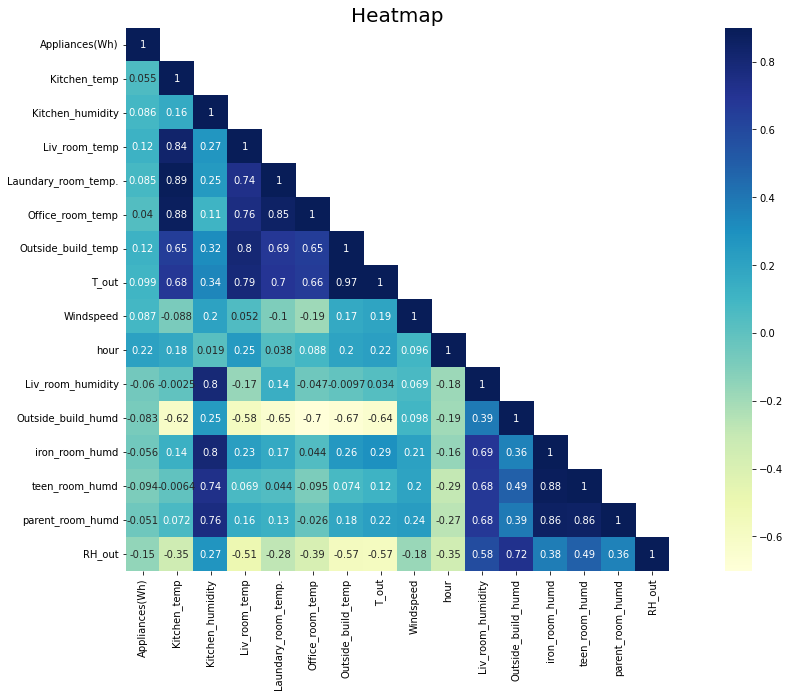

In [26]:
# looking at the correlation between numerical variables
corr = df_final[final_imp_col].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.title('Heatmap', fontsize=20)

Note: Heatmap showing high multicollinearity in the dataset. Let's try to understand it better with VIF values

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_final2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_final2.values, i)
                          for i in range(len(df_final2.columns))]

In [29]:
print(vif_data)

                feature          VIF
0        Appliances(Wh)     2.208654
1          Kitchen_temp  2993.903834
2      Kitchen_humidity  1542.815213
3         Liv_room_temp  2090.967638
4   Laundary_room_temp.  1108.141282
5      Office_room_temp   665.040277
6    Outside_build_temp    84.887421
7                 T_out    87.267740
8             Windspeed     4.988243
9                  hour     6.610228
10    Liv_room_humidity  1768.070289
11   Outside_build_humd    31.936441
12       iron_room_humd   359.071417
13       teen_room_humd   475.854506
14     parent_room_humd   545.111577
15               RH_out   166.166670


Note: It's clearly visible that most of the independent variables are highly correlated. We can't drop all of them but a transformation can be done to decrease the multicollinearity as far as possible.

### Log tranformation of original data

In [30]:
data_log_transformed = df_final.copy()
data_log_transformed['Appliances(Wh)'] = np.log(data_log_transformed['Appliances(Wh)'])

In [31]:
corr_matrix_transformed = data_log_transformed.corr()
corr_matrix_transformed[0:1]

,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,weekday,hour
Appliances(Wh),1.0,0.160747,0.084457,0.214756,-0.093674,0.167221,-0.006462,0.132359,-0.006533,0.110099,0.024312,0.196546,-0.174133,0.110415,-0.096231,0.153917,-0.165397,0.092553,-0.115582,0.176161,-0.072632,-0.226185,0.087722,-0.01097,0.056241,0.066296,0.018021,0.333394


In [32]:
corr_matrix_transformed = corr_matrix_transformed[['Appliances(Wh)']].copy()

In [33]:
corr_matrix_transformed.drop(index='Appliances(Wh)', inplace=True)

In [34]:
corr_matrix_transformed.sort_values('Appliances(Wh)', inplace=True)

In [35]:
# remove those features who have less than 10% (0.1) relationship with the target variable

features_to_keep = corr_matrix_transformed.loc[~corr_matrix_transformed['Appliances(Wh)'].between(-0.099, 0.0999)]

In [36]:
features_to_keep = features_to_keep.index.tolist()

In [37]:
features_to_keep

['RH_out',
 'Outside_build_humd',
 'teen_room_humd',
 'parent_room_humd',
 'bathroom_temp',
 'iron_room_temp',
 'Office_room_temp',
 'teen_room_temp',
 'Kitchen_temp',
 'Laundary_room_temp.',
 'T_out',
 'Outside_build_temp',
 'Liv_room_temp',
 'hour']

In [38]:
data_log_transformed = data_log_transformed[features_to_keep+['Appliances(Wh)']].copy()

In [39]:
data_log_transformed.shape

(19735, 15)

In [40]:
data_log_transformed.columns

Index(['RH_out', 'Outside_build_humd', 'teen_room_humd', 'parent_room_humd',
       'bathroom_temp', 'iron_room_temp', 'Office_room_temp', 'teen_room_temp',
       'Kitchen_temp', 'Laundary_room_temp.', 'T_out', 'Outside_build_temp',
       'Liv_room_temp', 'hour', 'Appliances(Wh)'],
      dtype='object')

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_log_transformed.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_log_transformed.values, i)
                          for i in range(len(data_log_transformed.columns))]

In [43]:
print(vif_data)

                feature          VIF
0                RH_out   135.575025
1    Outside_build_humd    33.043178
2        teen_room_humd   408.268190
3      parent_room_humd   481.850272
4         bathroom_temp   904.621001
5        iron_room_temp   994.688890
6      Office_room_temp   764.639923
7        teen_room_temp   855.863472
8          Kitchen_temp  2511.735672
9   Laundary_room_temp.  1114.722527
10                T_out    86.464774
11   Outside_build_temp    84.476223
12        Liv_room_temp   721.625450
13                 hour     5.882236
14       Appliances(Wh)    51.773923


Text(0.5, 1.0, 'Heatmap')

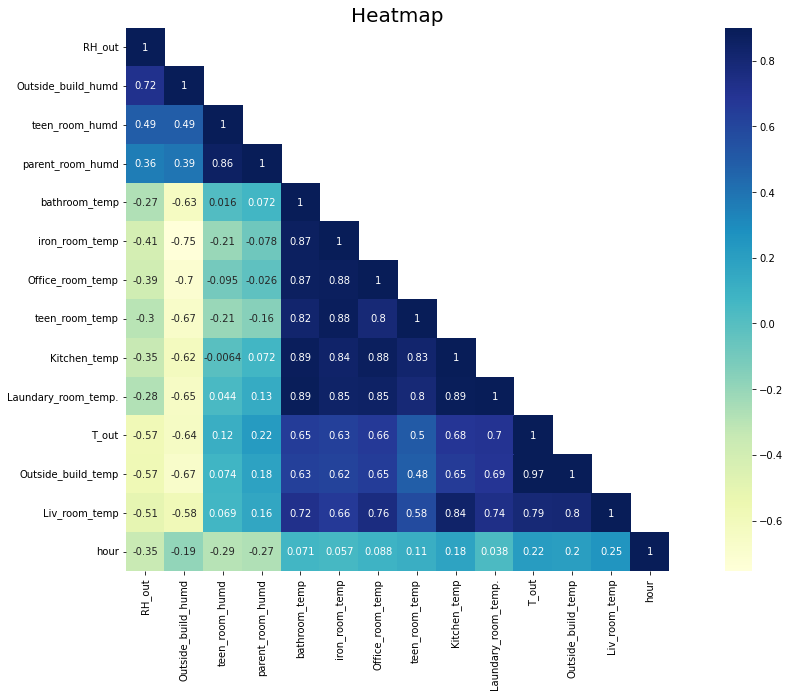

In [44]:
# looking at the correlation between numerical variables
corr = data_log_transformed[features_to_keep].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.title('Heatmap', fontsize=20)

Note: We decreased vif value to a large extent except for Kitchen temp. and Laundary room temp.

### Problem 2: Plot the distribution graph for all phyiscal features and define the statistics?

### Classifying the columns into the specific physical and other features

In [45]:
col_list = [e for e in list(data_log_transformed.columns)]
col_list.remove('Appliances(Wh)')

In [46]:
# Physical feature1 : Temperature
temp_col = [elem for elem in col_list if 'temp' in elem]
temp_col.append('T_out')
temp_col

['bathroom_temp',
 'iron_room_temp',
 'Office_room_temp',
 'teen_room_temp',
 'Kitchen_temp',
 'Laundary_room_temp.',
 'Outside_build_temp',
 'Liv_room_temp',
 'T_out']

In [47]:
# Physical feature2 : Humidity
humidity_col = [elem for elem in col_list if 'humidity' in elem]
humidity_col1 = [elem for elem in col_list if 'humd' in elem]
humidity_col+=humidity_col1
humidity_col.append('RH_out')
humidity_col

['Outside_build_humd', 'teen_room_humd', 'parent_room_humd', 'RH_out']

In [48]:
# Other features:
other_phy_features = ['Windspeed', 'Visibility','Tdewpoint']
temporal_features = ['Date', 'month','weekday', 'time', 'hour']

### All features: 
1. Independent Features: \
   temp_col \
   humidity_col \
   other_phy_features \
   temporal_features 
2. Dependent Feature: 'Appliances(Wh)'

#### Histogram for independent variables

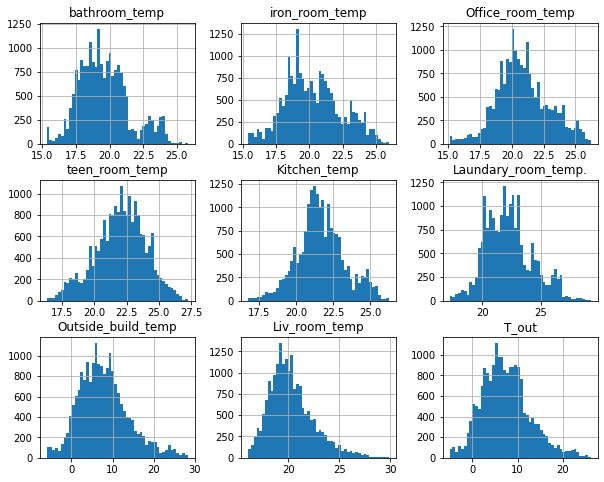

In [49]:
# Temperature variables
data_log_transformed[temp_col].hist(bins=50, figsize=(10,8));

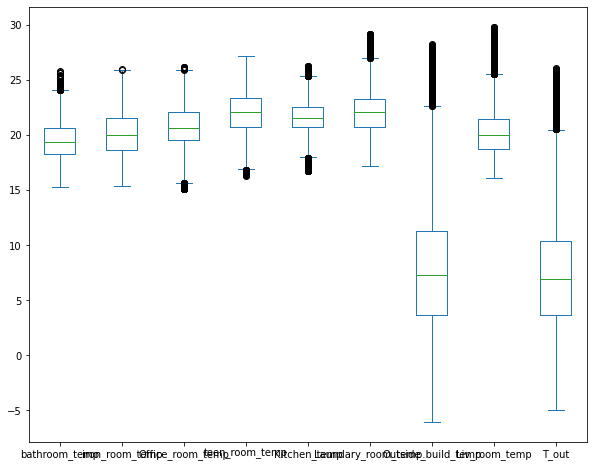

In [50]:
data_log_transformed[temp_col].plot.box(figsize=(10,8));

#### Observations:
1. All temperature graphs are almost normalised which means there is a mean temperature with highest frequency. There is small skewness in some which can be neglected.

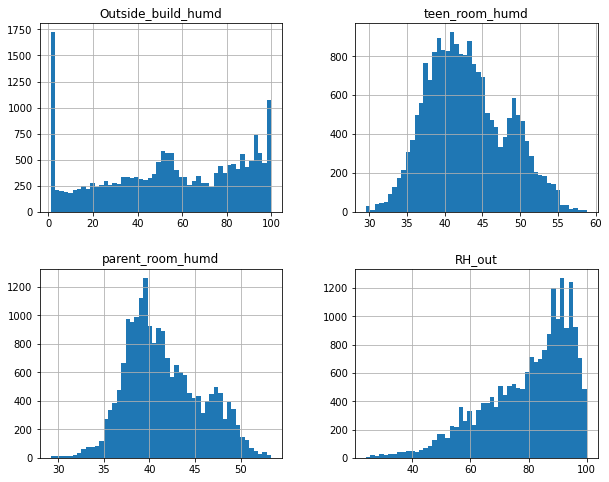

In [51]:
# Humidity variables
data_log_transformed[humidity_col].hist(bins=50, figsize=(10,8));

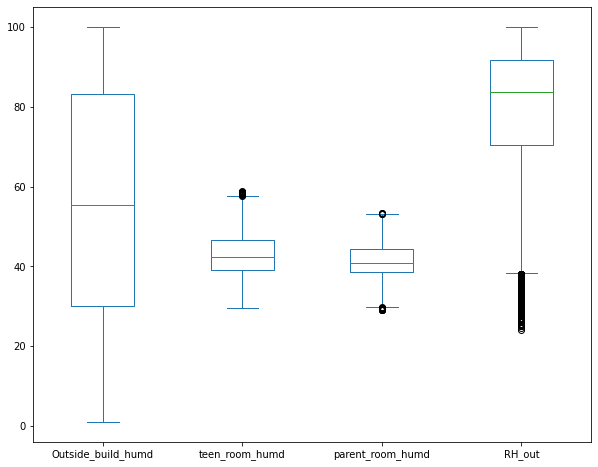

In [52]:
data_log_transformed[humidity_col].plot.box(figsize=(10,8));

#### Observations
1. RH_out(Airport data) is negatively skewed which means most of the days get high humidity.
2. Outside building humidity seems to have equal distribution of frequency with all sorts of humidity percentage.

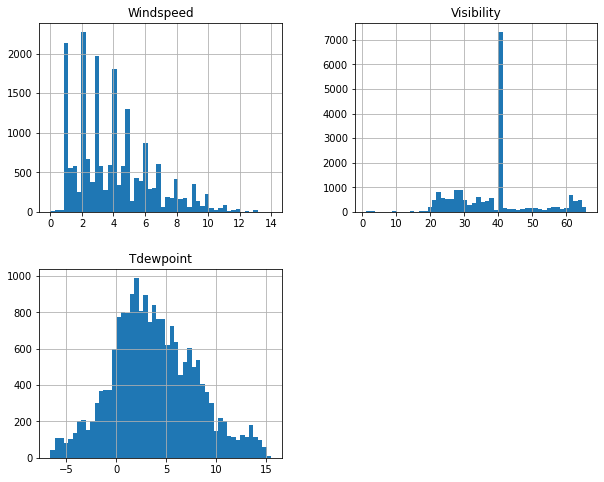

In [53]:
# Other Physical Features
df_final[other_phy_features].hist(bins=50, figsize=(10,8));

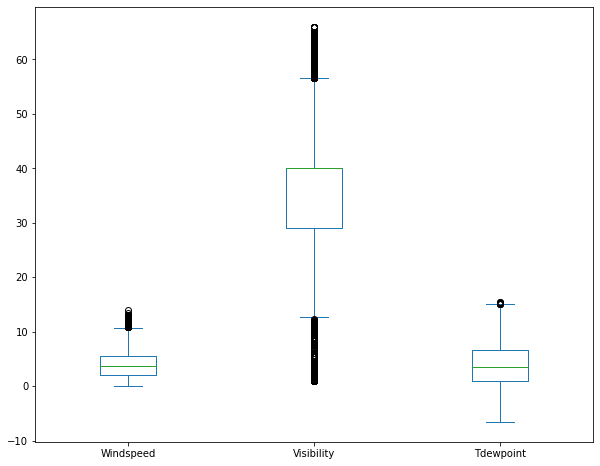

In [54]:
df_final[other_phy_features].plot.box(figsize=(10,8));

1. For most of the days, windspeed is quite low (1 to 5 m/s)
2. Most of the days across the year has visibility 40%.
3. Dew point temp. mostly ranged from 0 to 5 degree celsius. This tells, 100% humidity achieved in that temp. range.

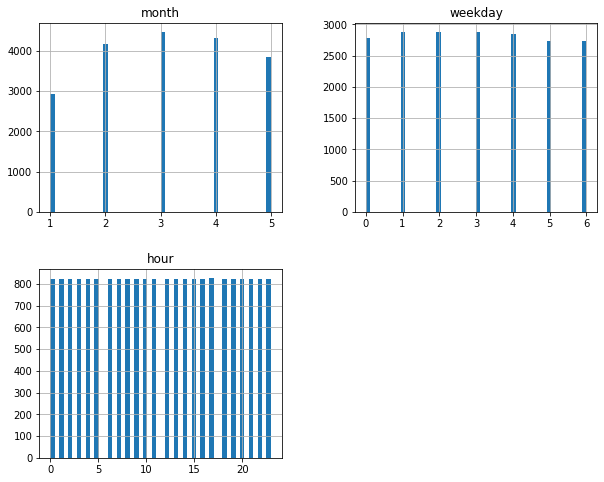

In [55]:
# Temporal Features
df_final[temporal_features].hist(bins=50, figsize=(10,8));

In [56]:
df_final['weekday'].value_counts()

1    2880
2    2880
3    2880
4    2845
0    2778
5    2736
6    2736
Name: weekday, dtype: int64

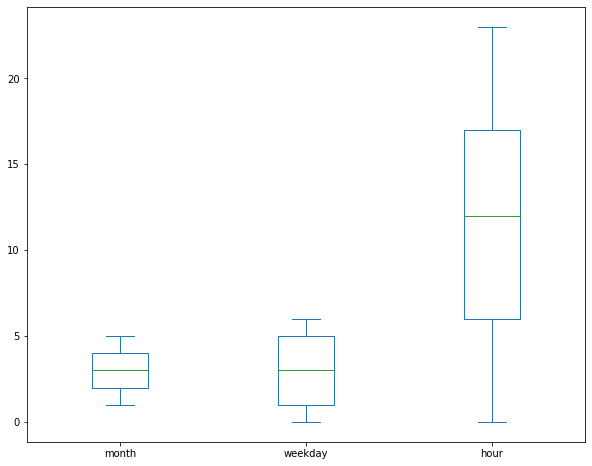

In [57]:
df_final[temporal_features].plot.box(figsize=(10,8));

In [58]:
print('Mean appliance energy use in the')
energy_unit = []
for elem in list(df_final['shift'].unique()):
    mean = np.mean(df_final[df_final['shift']==elem]['Appliances(Wh)'])
    print(f'{elem}: {mean}')
    energy_unit.append(mean)

Mean appliance energy use in the
Evening: 164.92923574605743
Night: 87.40267639902676
Late Night: 51.062449310624494
Early Morning: 52.01034063260341
Morning: 105.73905109489051
Afternoon: 119.25385239253852


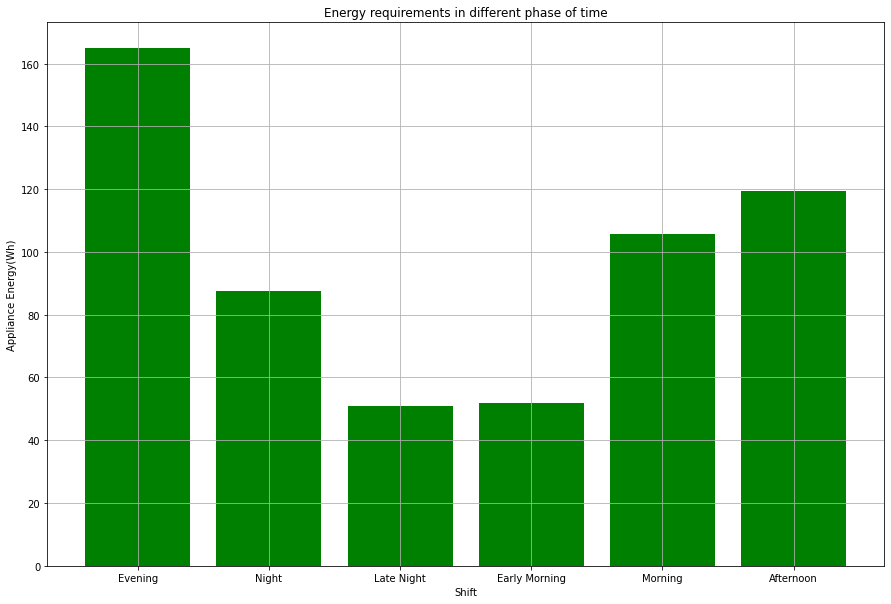

In [60]:
shift = list(df_final['shift'].unique())
shift_df= pd.DataFrame(zip(energy_unit,shift), columns={'energy_unit','shift'})
x_label = shift_df['shift']
y_label = shift_df['energy_unit']
plt.bar(x_label,y_label,color='green')
plt.title('Energy requirements in different phase of time')
plt.xlabel('Shift')
plt.ylabel('Appliance Energy(Wh)')
plt.rcParams['figure.figsize'] = (15, 10) 
plt.grid()

#### Conclusion: Maximum power supply is required during evening while late night has lowest energy concumption


In [ ]:
#df_final.to_csv('appliance_df.csv')

In [ ]:
df_final.head()

,DateTime,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Date,month,weekday,time,hour,shift
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,2016-01-11,1,0,17:00:00,17,Evening
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,2016-01-11,1,0,17:10:00,17,Evening
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,2016-01-11,1,0,17:20:00,17,Evening
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,2016-01-11,1,0,17:30:00,17,Evening
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,2016-01-11,1,0,17:40:00,17,Evening


### Observations: 
Maximum data is available for March while January has the minimum data available


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


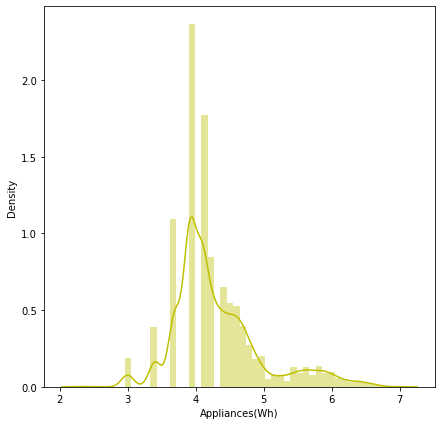

In [ ]:
# Dependent variable 'Appliances(Wh)' - Frequency
plt.figure(figsize=(7,7))
sns.distplot(data_log_transformed['Appliances(Wh)'],color="y")

Conclusion:
1. For most of the days appliance energy range was 0 to 50 Wh.
2. The high energy use is occasional.

### Problem 3 : Analyze the weather condition for the region and mention seasons with months.

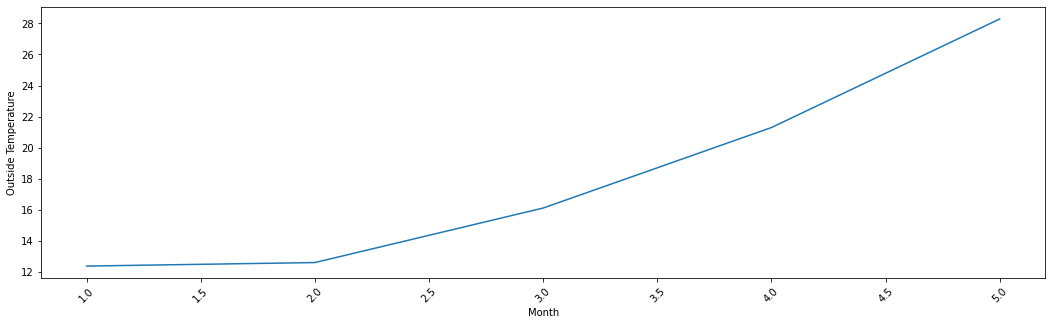

In [ ]:
# Comparing months with temperature
p1 = df_final[['month','Outside_build_temp']]
p1_sorted = p1.sort_values('month', ascending=True)
mean_p1 = p1_sorted.groupby('month').max()
mean_p1
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(mean_p1['Outside_build_temp'])
plt.xlabel('Month')
plt.ylabel('Outside Temperature')
plt.xticks(rotation=45)
plt.show()

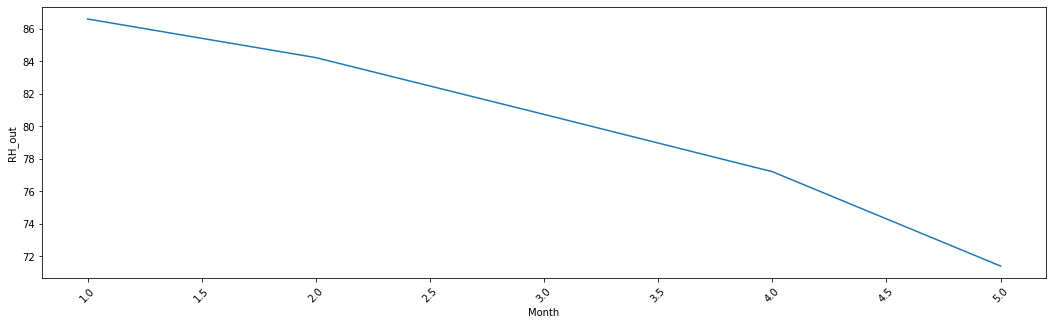

In [ ]:
# Comparing months with humidity
p2 = df_final[['month','RH_out']]
p2_sorted = p2.sort_values('month', ascending=True)
mean_p2 = p2_sorted.groupby('month').mean()
mean_p2
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(mean_p2['RH_out'])
plt.xlabel('Month')
plt.ylabel('RH_out')
plt.xticks(rotation=45)
plt.show()

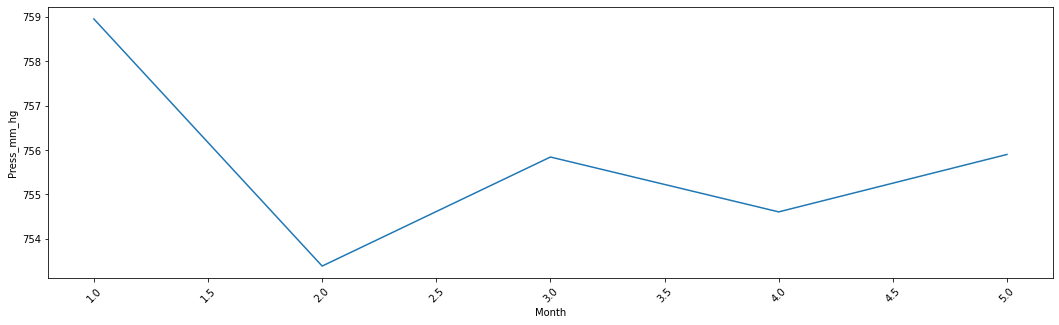

In [ ]:
# Comparing months with humidity
p2 = df_final[['month','Press_mm_hg']]
p2_sorted = p2.sort_values('month', ascending=True)
mean_p2 = p2_sorted.groupby('month').mean()
mean_p2
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(mean_p2['Press_mm_hg'])
plt.xlabel('Month')
plt.ylabel('Press_mm_hg')
plt.xticks(rotation=45)
plt.show()

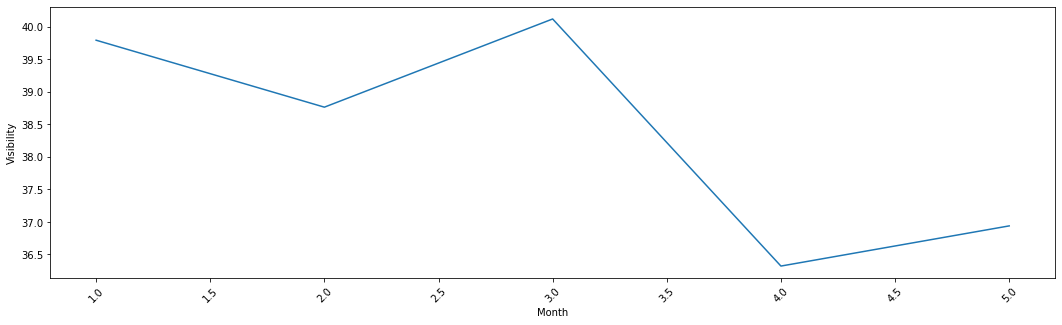

In [ ]:
# Comparing months with humidity
p2 = df_final[['month','Visibility']]
p2_sorted = p2.sort_values('month', ascending=True)
mean_p2 = p2_sorted.groupby('month').mean()
mean_p2
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(mean_p2['Visibility'])
plt.xlabel('Month')
plt.ylabel('Visibility')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Let's create a new column name season:
df_1 = df_final[df_final['month']==1]
df_1['T_out'].mean()  # Range = -5 to 13 and mean: 4.5
df_2 = df_final[df_final['month']==5]
df_2['T_out'].max()  # Range = 0.1 to 23.1 and mean: 12.20


df_11 = df_final[df_final['month']==1]
df_11['RH_out'].min()  # Range = 38 to 100 and mean: 85.75%
df_22 = df_final[df_final['month']==5]
df_22['RH_out'].max()  # Range = 28 to 100 and mean: 76.69%


df_111 = df_final[df_final['month']==1]
df_111['Windspeed'].mean()  # Range = 0.0 to 12 and mean: 4.74
df_222 = df_final[df_final['month']==5]
df_222['Windspeed'].mean()  # Range = 0.0 to 10 and mean: 3.25%


df_1111 = df_final[df_final['month']==1]
df_1111['Visibility'].max()  # Range = 2 to 65 and mean: 40.23%
df_2222 = df_final[df_final['month']==5]
df_2222['Visibility'].mean()  # Range = 1 to 65 and mean: 36.97%

36.9391383337659

### Observations:
1. January has temperature ranging from -6 to 12 degree celcius and average 4 degree celcius while a high humidity,i.e.,50% to 86%. High humidity and low temp. means winter.
2. May has temperature range 1 to 28 degree celcius and average 14 degree celcius while a low humidity,i.e.,25% and average humidity 72%. So, high temp. and lower humidity suggest summer.


### Problem 4 : Analyze the energy consumption w.r.t. humidity, temp., pressure, visibility one by one.

### Appliance use with temperature variation

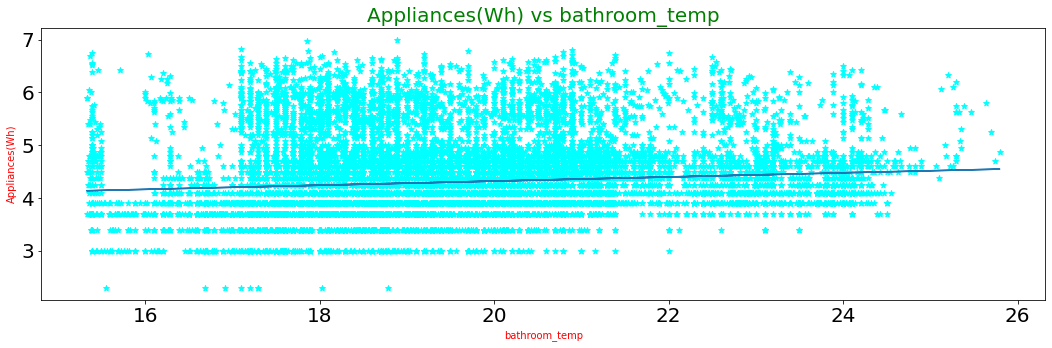

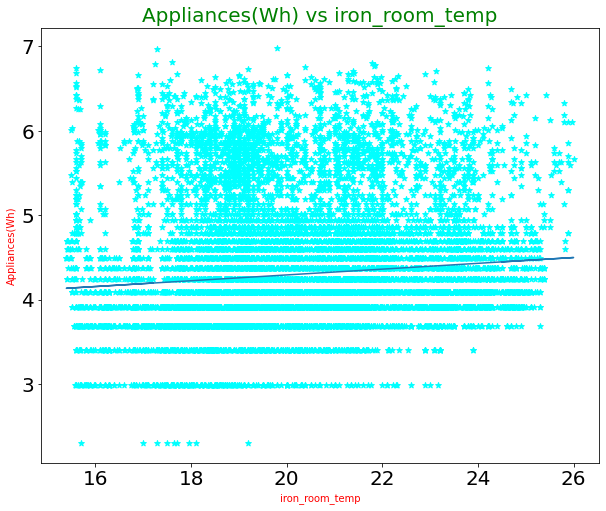

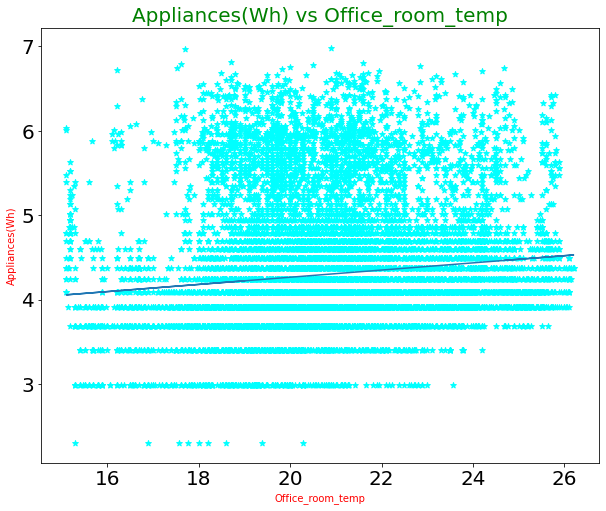

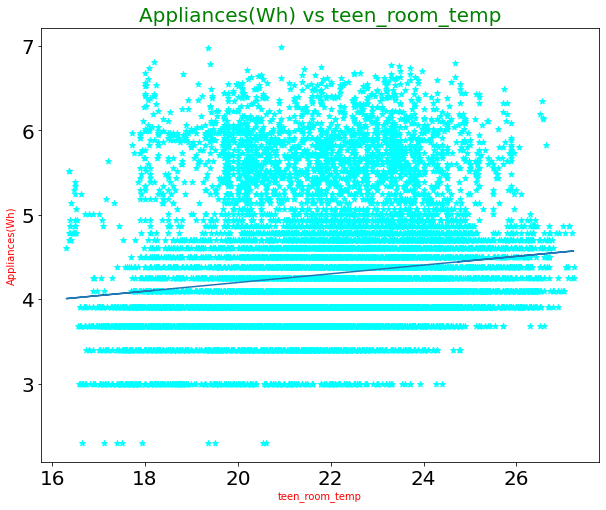

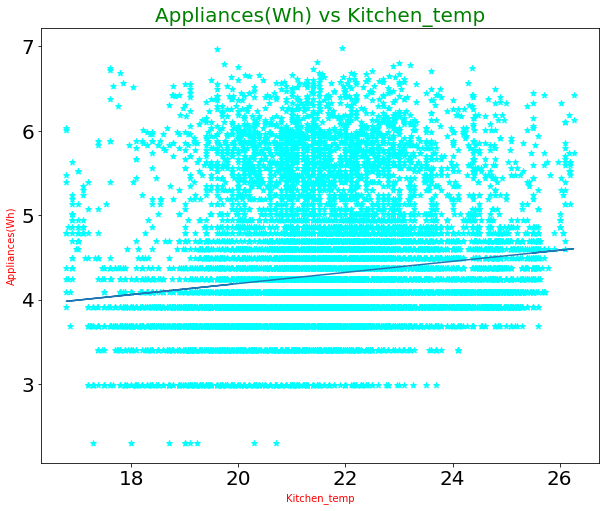

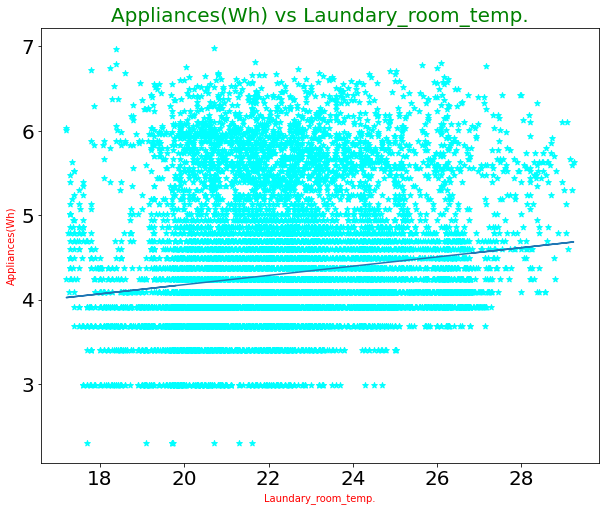

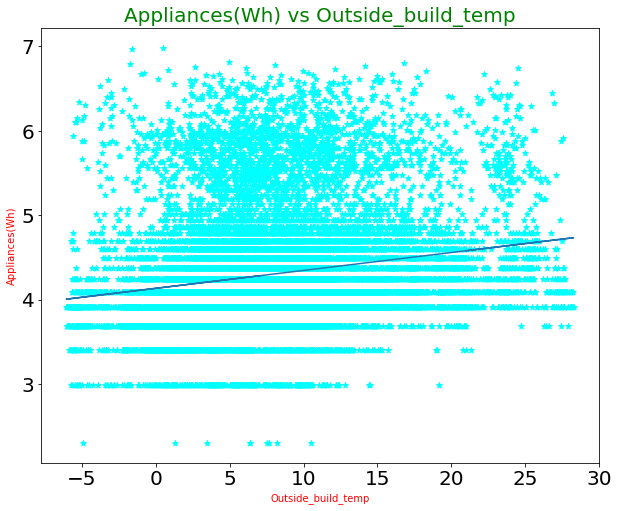

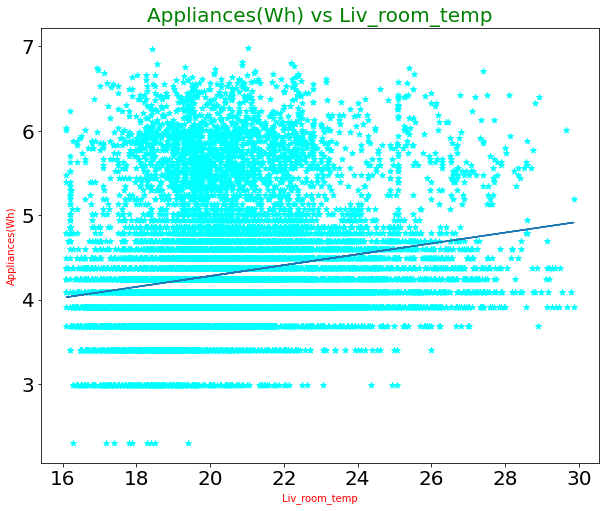

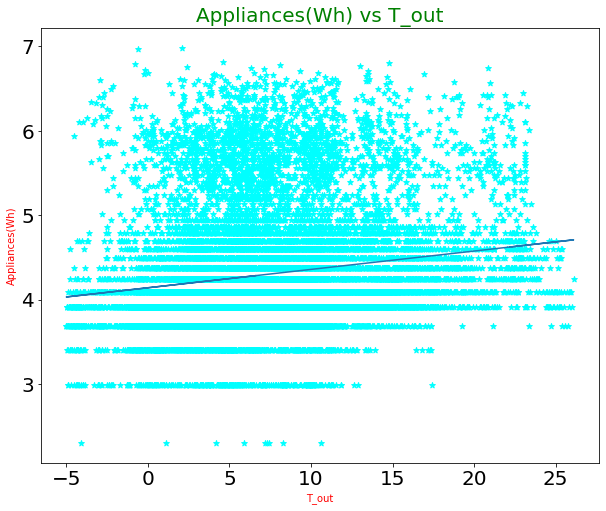

In [ ]:
### Visualizing the dependent and independent variables(temperature) with linear model tools
from sklearn import linear_model
for elem in temp_col:
    y = data_log_transformed['Appliances(Wh)']
    reg = linear_model.LinearRegression()
    reg.fit(data_log_transformed[[elem]],y)
    plt.title(f'Appliances(Wh) vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances(Wh)', color='red')
    plt.scatter(data_log_transformed[elem],y, color='cyan', marker='*')
    plt.plot(data_log_transformed[elem], reg.predict(data_log_transformed[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

#### Observations:
1. Appliance energy use is slowly increasing with increase in temp.
2. More appliances are used in summers as compared to winters. This may also means, air conditioners might be consuming more energy than heaters or more air conditioners were used in summers compared to heaters in winters.

### Appliance use with humidity

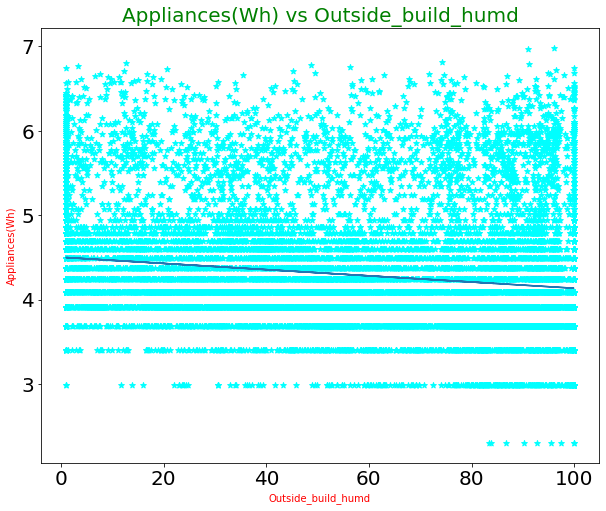

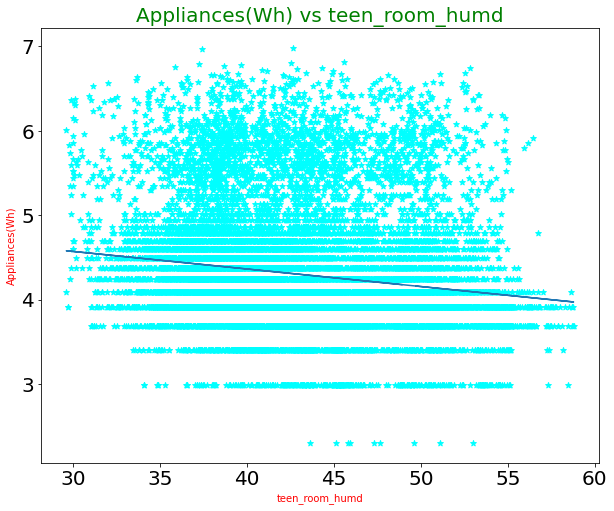

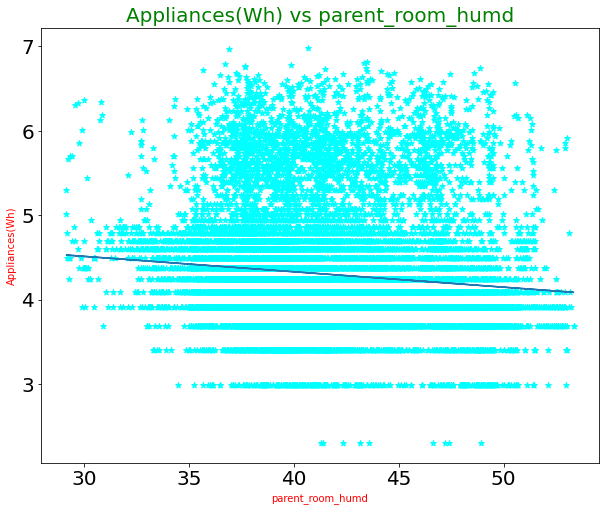

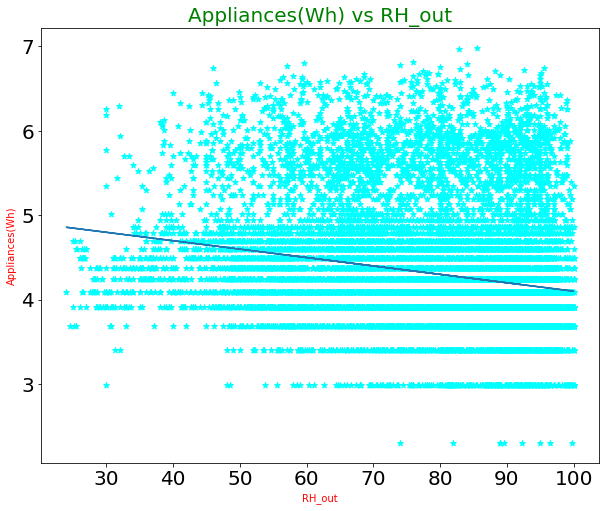

In [ ]:
### Visualizing the dependent and independent variables(humidity) with linear model tools
from sklearn import linear_model
for elem in humidity_col:
    y = data_log_transformed['Appliances(Wh)']
    reg = linear_model.LinearRegression()
    reg.fit(data_log_transformed[[elem]],y)
    plt.title(f'Appliances(Wh) vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances(Wh)', color='red')
    plt.scatter(data_log_transformed[elem],y, color='cyan', marker='*')
    plt.plot(data_log_transformed[elem], reg.predict(data_log_transformed[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

### Appliance use with other features(windspeed, visibility, Tdewpoint)

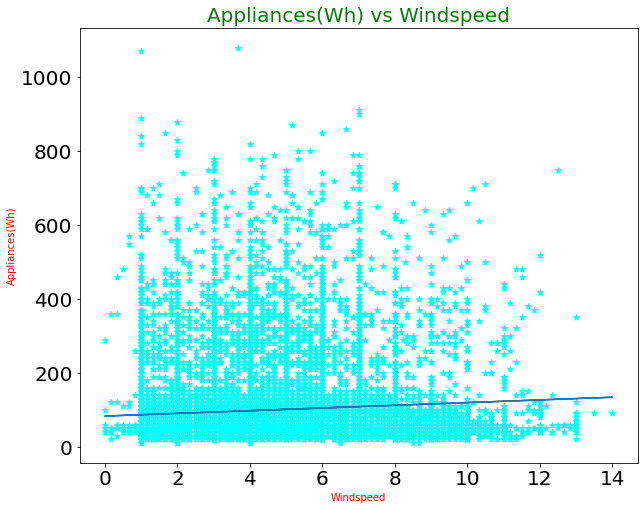

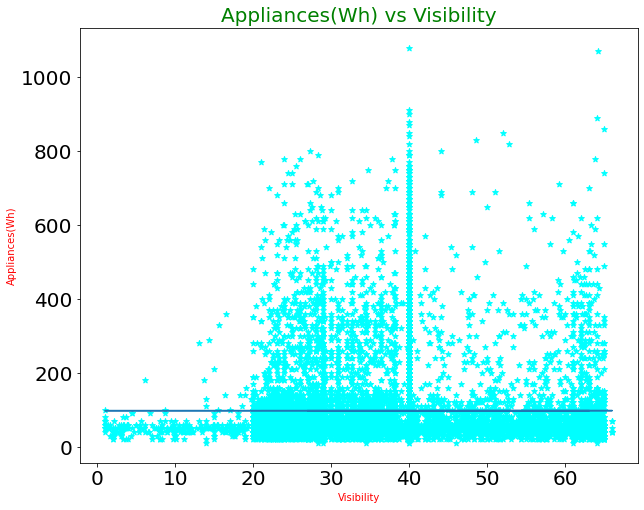

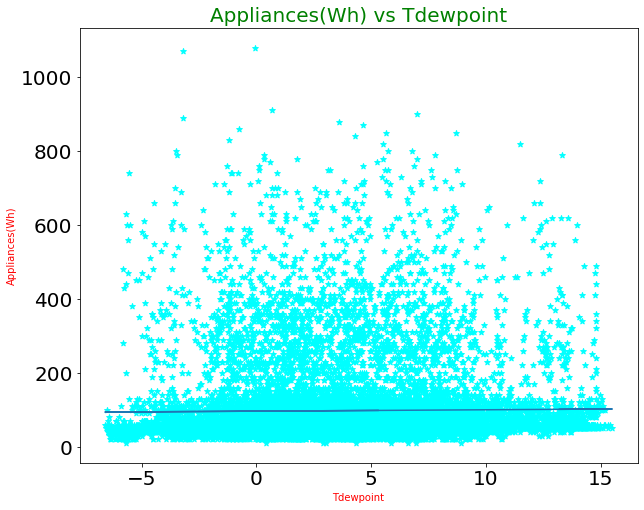

In [ ]:
### Visualizing the dependent and independent variables(other features) with linear model tools
from sklearn import linear_model
for elem in other_phy_features:
    y = df_final['Appliances(Wh)']
    reg = linear_model.LinearRegression()
    reg.fit(df_final[[elem]],y)
    plt.title(f'Appliances(Wh) vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances(Wh)', color='red')
    plt.scatter(df_final[elem],y, color='cyan', marker='*')
    plt.plot(df_final[elem], reg.predict(df_final[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

#### Observations:
1. During winters, increase in windspeed may cause decline in temperature. So, more heaters may be used. Hence, more energy consumption.

### Problem 5: Which days of week will require more power supply?

### Appliance use with date and time

In [ ]:
temporal_features.remove('Date')
temporal_features.remove('time')

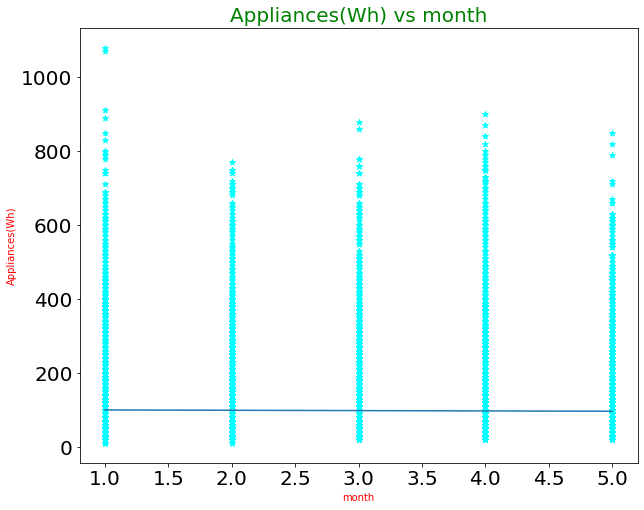

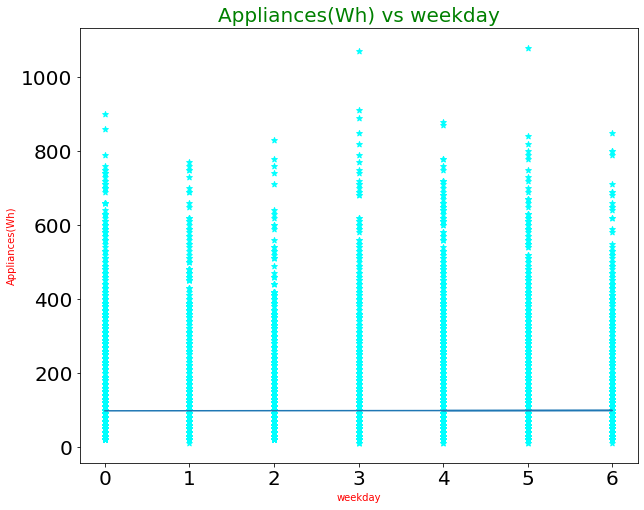

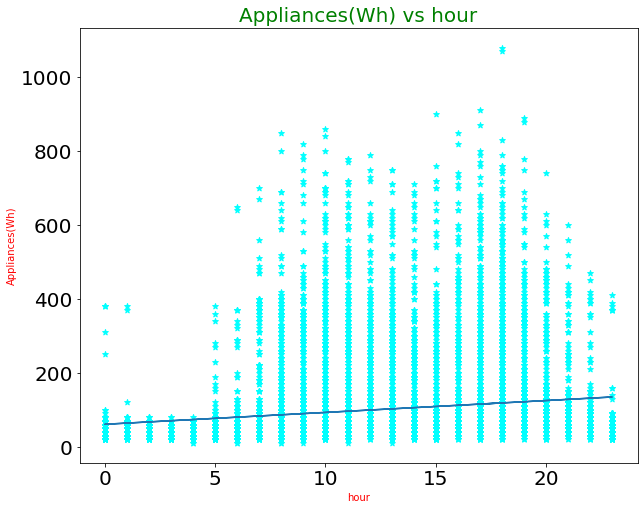

In [ ]:
### Visualizing the dependent and independent variables(temporal features) with linear model tools
from sklearn import linear_model
for elem in temporal_features:
    y = df_final['Appliances(Wh)']
    reg = linear_model.LinearRegression()
    reg.fit(df_final[[elem]],y)
    plt.title(f'Appliances(Wh) vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances(Wh)', color='red')
    plt.scatter(df_final[elem],y, color='cyan', marker='*')
    plt.plot(df_final[elem], reg.predict(df_final[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

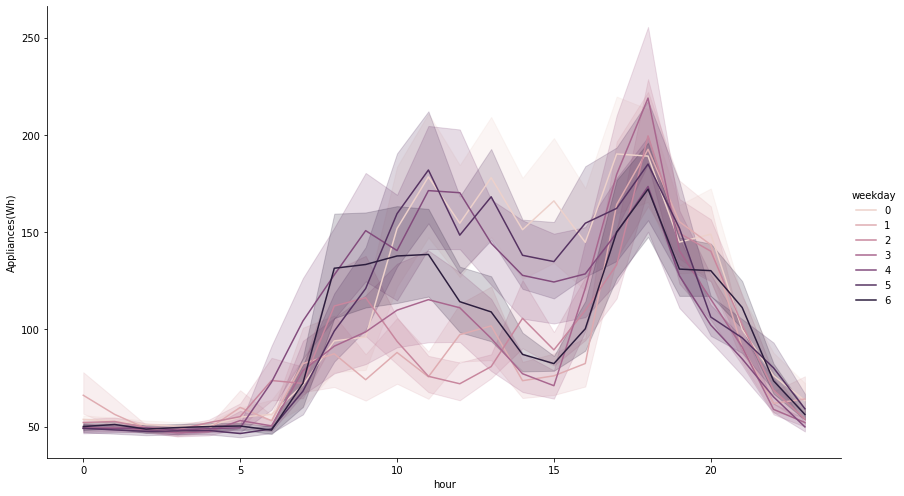

In [ ]:
sns.relplot(y='Appliances(Wh)', x='hour', data=df_final, kind='line', hue='weekday', height=7, aspect=1.7)
plt.show()

### Observations
1. Monthly: Highest energy use is in the month of January(Winter), while lowest energy use is in the month of june(Summers). This is a contradiction to the previous observations. Possible reason - Less availablity of data in summer.
2. Daily: Highest energy use is in the evening(about 5:00 P.M. to 7:00 P.M.), while lowest energy use is during late night(1:00 A.M. to 4:00 A.M.).
3. Weekly: Wednesday and Friday has highest appliance use, while Tuesday has lowest appliance energy use.

### Problem 6: How much power supply will be needed for different phase of a normal day?

### Energy Use in 6 phases of day

In [ ]:
phase_list2 = ['df_erl_morn', 'df_morn', 'df_aft_noon', 'df_eve', 'df_nig', 'df_late_nig']
# Evening, night, late night, early morning, morning, afternoon
df_eve = df_final[(df_final['time']>='17:00:00') & (df_final['time']<'20:00:00')]
df_nig = df_final[(df_final['time']>='20:00:00') & (df_final['time']<'24:00:00')]
df_late_nig = df_final[(df_final['time']>='00:00:00') & (df_final['time']<'03:00:00')]
df_erl_morn = df_final[(df_final['time']>='03:00:00') & (df_final['time']<'07:00:00')]
df_morn = df_final[(df_final['time']>='07:00:00') & (df_final['time']<'11:00:00')]
df_aft_noon = df_final[(df_final['time']>='11:00:00') & (df_final['time']<'17:00:00')]

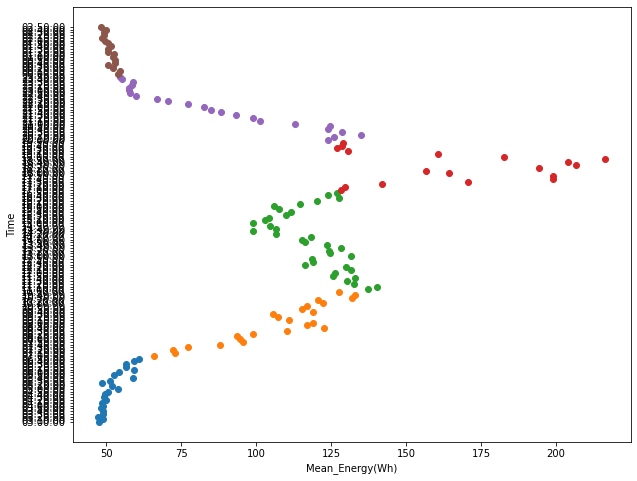

In [ ]:
phase_list = [df_erl_morn, df_morn, df_aft_noon, df_eve, df_nig, df_late_nig]
for elem1 in phase_list:
    time_list = list(elem1.time.unique())
    mean_list = [(elem1[elem1['time']==elem2])['Appliances(Wh)'].mean() for elem2 in time_list]
    phase_df = pd.DataFrame(time_list, mean_list, columns=['phase_time']).reset_index().rename(columns={'index':'Mean_Energy'}) 
    x = phase_df['Mean_Energy']
    y = phase_df['phase_time']
    plt.xlabel('Mean_Energy(Wh)')
    plt.ylabel('Time')
    plt.rcParams['figure.figsize'] = (30,30)
    plt.scatter(x,y)


### Observations:
1. Day-night energy graph is a kind of binomial distribution which is positively skewed. That is, the peak is more towards the night energy use.
2. Early morning and late night has almost same appliance use. While evening has the highest energy use.
3. From mid-morning to afternoon there is constant use of appliances.

### Problem 7: List the daily appliance use for 5 months.

In [ ]:
date_list = list(df_final['Date'].unique())
date_list

['2016-01-11',
 '2016-01-12',
 '2016-01-13',
 '2016-01-14',
 '2016-01-15',
 '2016-01-16',
 '2016-01-17',
 '2016-01-18',
 '2016-01-19',
 '2016-01-20',
 '2016-01-21',
 '2016-01-22',
 '2016-01-23',
 '2016-01-24',
 '2016-01-25',
 '2016-01-26',
 '2016-01-27',
 '2016-01-28',
 '2016-01-29',
 '2016-01-30',
 '2016-01-31',
 '2016-02-01',
 '2016-02-02',
 '2016-02-03',
 '2016-02-04',
 '2016-02-05',
 '2016-02-06',
 '2016-02-07',
 '2016-02-08',
 '2016-02-09',
 '2016-02-10',
 '2016-02-11',
 '2016-02-12',
 '2016-02-13',
 '2016-02-14',
 '2016-02-15',
 '2016-02-16',
 '2016-02-17',
 '2016-02-18',
 '2016-02-19',
 '2016-02-20',
 '2016-02-21',
 '2016-02-22',
 '2016-02-23',
 '2016-02-24',
 '2016-02-25',
 '2016-02-26',
 '2016-02-27',
 '2016-02-28',
 '2016-02-29',
 '2016-03-01',
 '2016-03-02',
 '2016-03-03',
 '2016-03-04',
 '2016-03-05',
 '2016-03-06',
 '2016-03-07',
 '2016-03-08',
 '2016-03-09',
 '2016-03-10',
 '2016-03-11',
 '2016-03-12',
 '2016-03-13',
 '2016-03-14',
 '2016-03-15',
 '2016-03-16',
 '2016-03-

In [ ]:
df_final[df_final['Date']=='2016-01-11']['Appliances(Wh)'].sum()

5740

In [ ]:
appliance_list = []
for elem in date_list:
    use_1 = df_final[df_final['Date']==elem]['Appliances(Wh)'].sum()
    appliance_list.append(use_1)

In [ ]:
df_date_use = pd.DataFrame(appliance_list, date_list).reset_index().rename(columns={'index':'Date',0:'Appliance Use'})
df_date_use
df_date_use['Date'] = pd.to_datetime(df_date_use['Date'])
df_date_use['month'] = df_date_use['Date'].dt.month

In [ ]:
df_date_use

,Date,Appliance Use,month
0,2016-01-11,5740,1
1,2016-01-12,12340,1
2,2016-01-13,13970,1
3,2016-01-14,21800,1
4,2016-01-15,18050,1
...,...,...,...
133,2016-05-23,11960,5
134,2016-05-24,13850,5
135,2016-05-25,12080,5
136,2016-05-26,21170,5


In [ ]:
print('Mean Appliance use(Wh) in the society building per day ')

# January:
df_1 = df_date_use[df_date_use['month']==1]
print('Mean for January')
print(df_1['Appliance Use'].mean())

# February:
df_2 = df_date_use[df_date_use['month']==2]
print('Mean for February')
print(df_2['Appliance Use'].mean())

# March:
df_3 = df_date_use[df_date_use['month']==3]
print('Mean for March')
print(df_3['Appliance Use'].mean())

# April:
df_4 = df_date_use[df_date_use['month']==4]
print('Mean for April')
print(df_4['Appliance Use'].mean())

# May:
df_4 = df_date_use[df_date_use['month']==5]
print('Mean for May')
print(df_4['Appliance Use'].mean())


Mean Appliance use(Wh) in the society building per day 
Mean for January
13500.47619047619
Mean for February
14536.206896551725
Mean for March
13961.290322580646
Mean for April
14240.0
Mean for May
13442.592592592593


### Problem 8: Apply Machine Learning algorithm and find the best model that fits the dataset.

# Step 5:

## Processing the data before feeding it to ML models.

### Train-Test split

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# splitting in dependent and independent variables
x = data_log_transformed.drop(['Appliances(Wh)'], axis=1)
y = data_log_transformed[['Appliances(Wh)']]

In [ ]:
# perfoming train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=41)

### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, auc
import time

In [ ]:
start = time.time()
model1 = DecisionTreeRegressor(random_state=200)
model1.fit(x_train, y_train)
end = time.time()
train_time = end - start
print('Training_Time:')
print(train_time)

Training_Time:
0.3451504707336426


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=200)

### Measuring the performance

In [ ]:
y_pred_test = model1.predict(x_test)
y_pred_train = model1.predict(x_train)

In [ ]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.9548686074623695
Test Score:0.9496995361202017
MAE:0.028897311000629148
MSE:0.021207167025372713
RMSE :  0.145627


In [ ]:
model1.score(x_test, y_test)

0.9496995361202017

### Visualizing the predicted vs test value

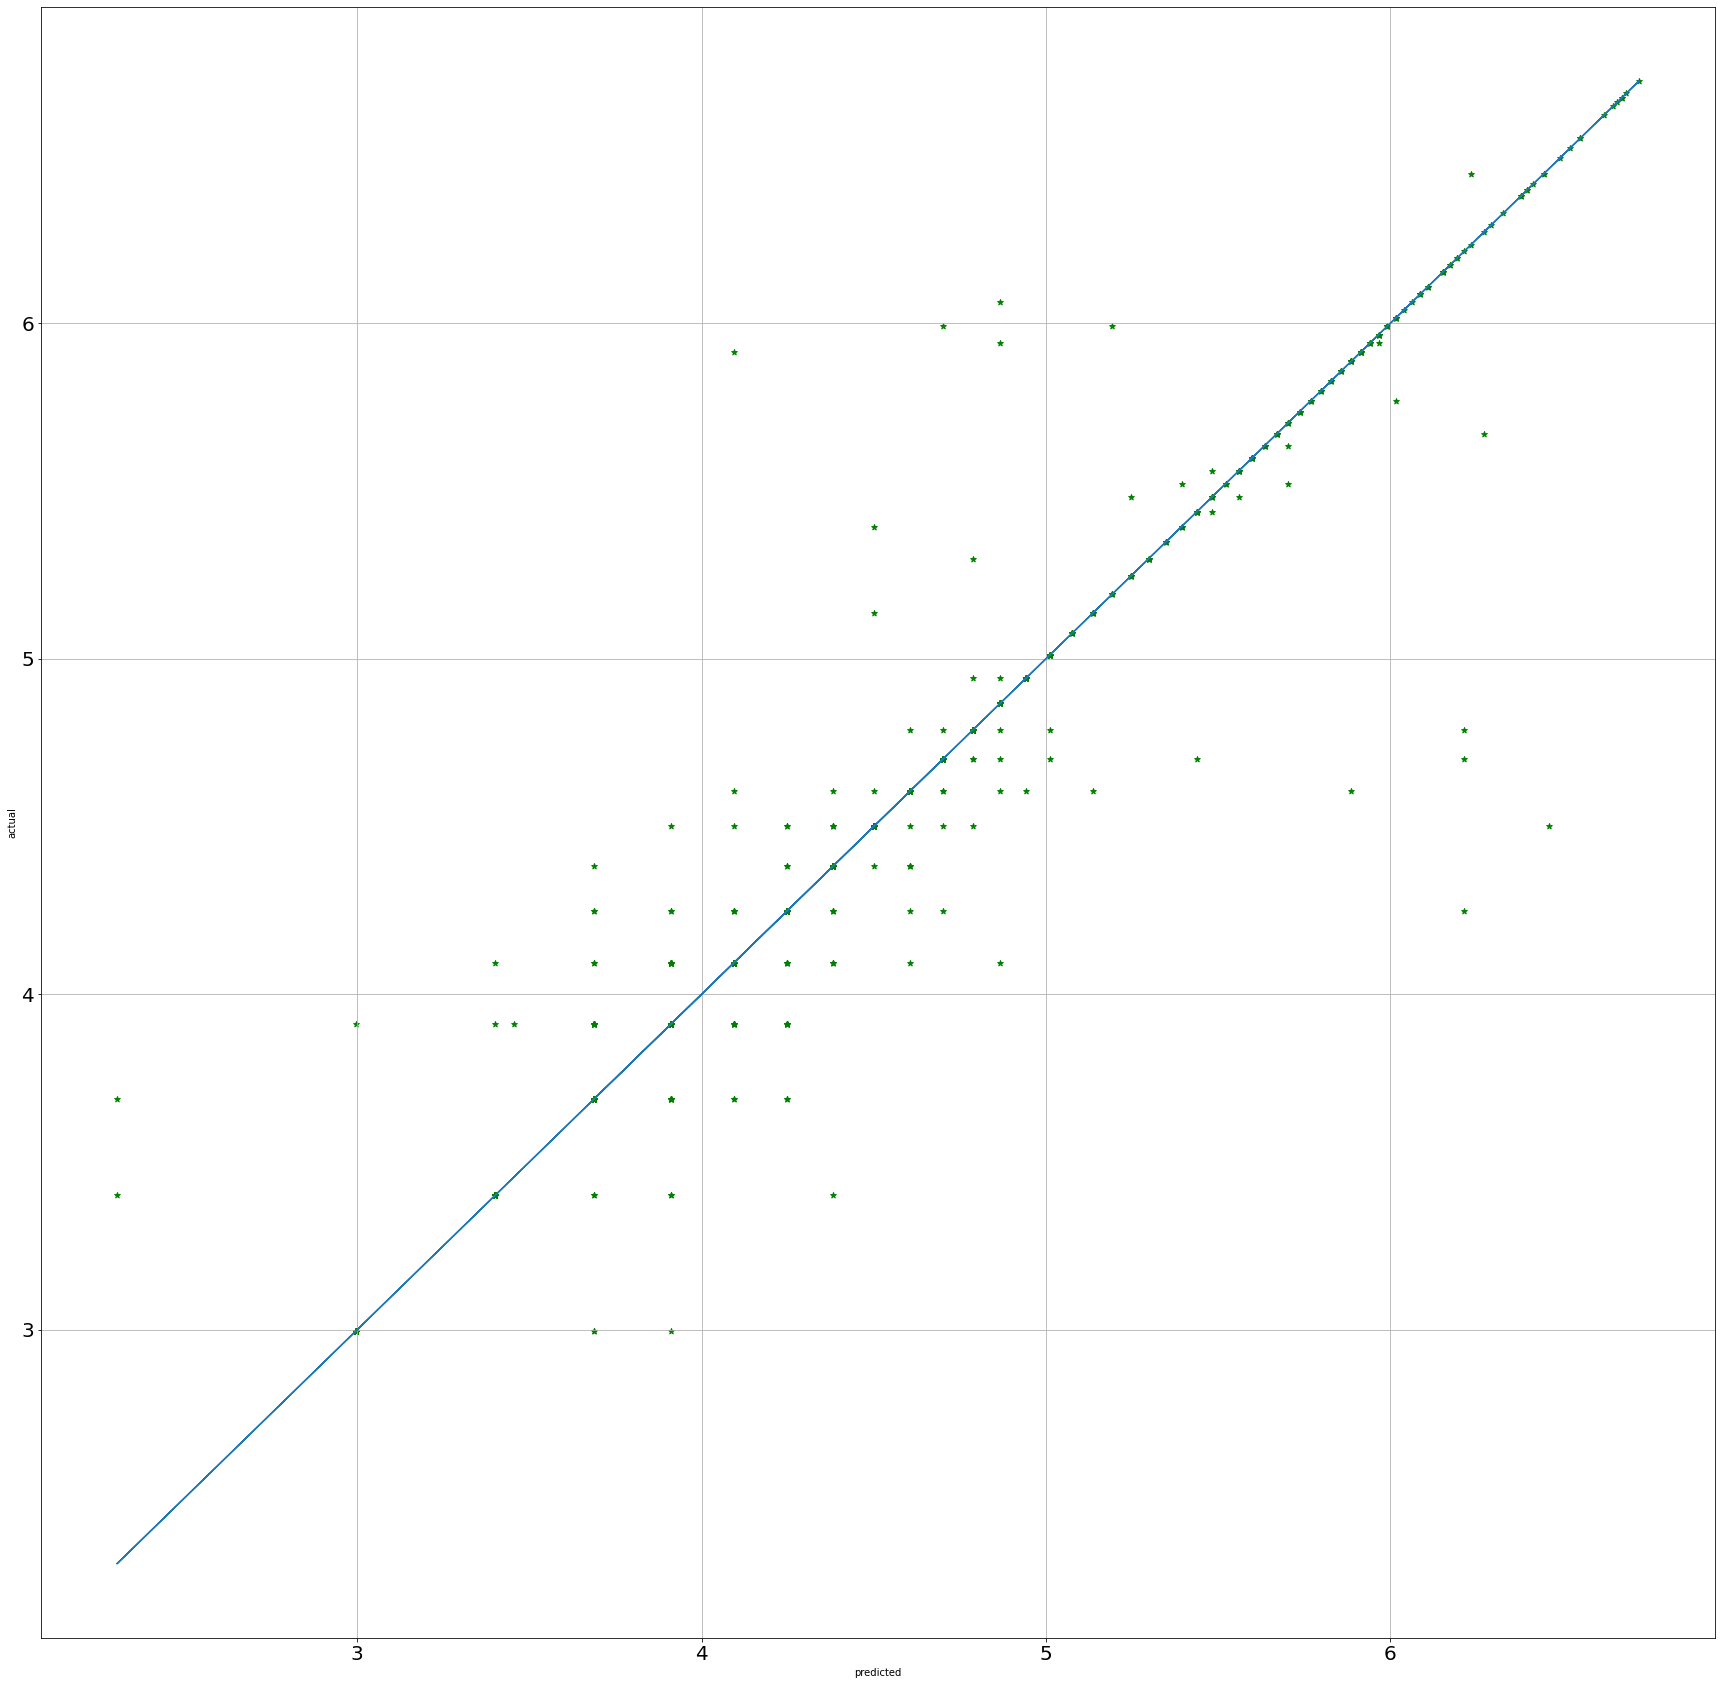

In [ ]:
plt.xlabel('predicted')
plt.ylabel('actual')
plt.scatter(y_pred_test, y_test, color='green', marker='*')
plt.plot(y_pred_test, model1.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (15,10)
plt.grid()
plt.show()

### Random Forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=41)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import time
start = time.time()
model2 = RandomForestRegressor(criterion='mse', random_state=200)
model2.fit(x_train, y_train)
end = time.time()
train_time = end - start
print('Training_Time:')
print(train_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Training_Time:
20.39093565940857


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=200)

In [ ]:
y_pred_test = model2.predict(x_test)
y_pred_train = model2.predict(x_train)

In [ ]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.9411667013597079
Test Score:0.9423143034751615
MAE:0.09509836016294805
MSE:0.024320853264904685
RMSE :  0.155951


In [ ]:
model2.score(x_test, y_test)

0.9423143034751615

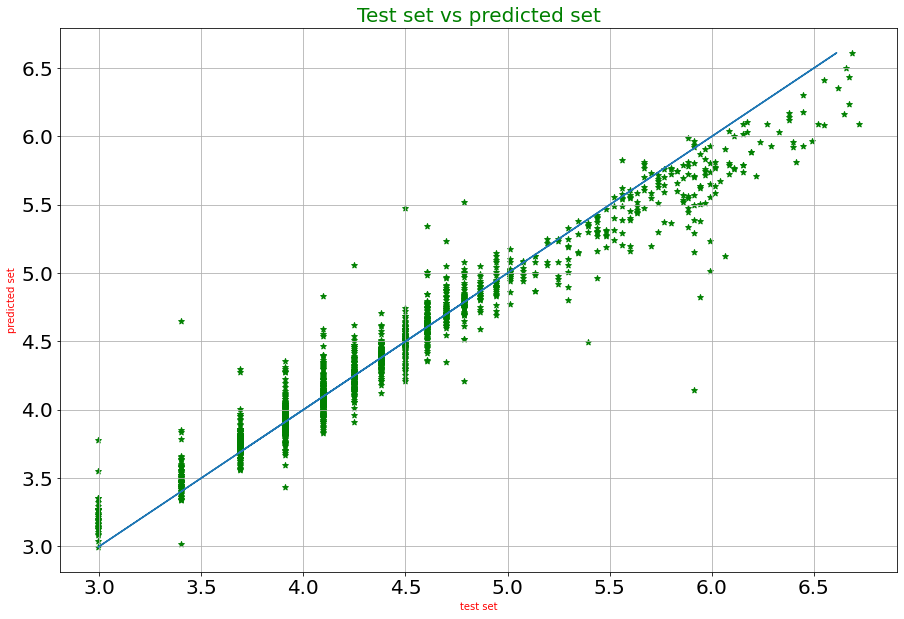

In [ ]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test,y_pred_test, color='green', marker='*')
plt.plot(y_pred_test, model2.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (15,10)
plt.grid()
plt.show()

### ExtraTreeRegressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=41)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
start = time.time()
model3 = ExtraTreesRegressor(criterion='mse', random_state=200)
model3.fit(x_train, y_train)
end = time.time()
train_time = end - start
print('Training_Time:')
print(train_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Training_Time:
6.70884895324707


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=200)

In [ ]:
y_pred_test = model3.predict(x_test)
y_pred_train = model3.predict(x_train)

In [ ]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.9782578094542572
Test Score:0.9760687750546259
MAE:0.02000476253955391
MSE:0.010089638253657189
RMSE :  0.100447


In [ ]:
model3.score(x_test, y_test)

0.9760687750546259

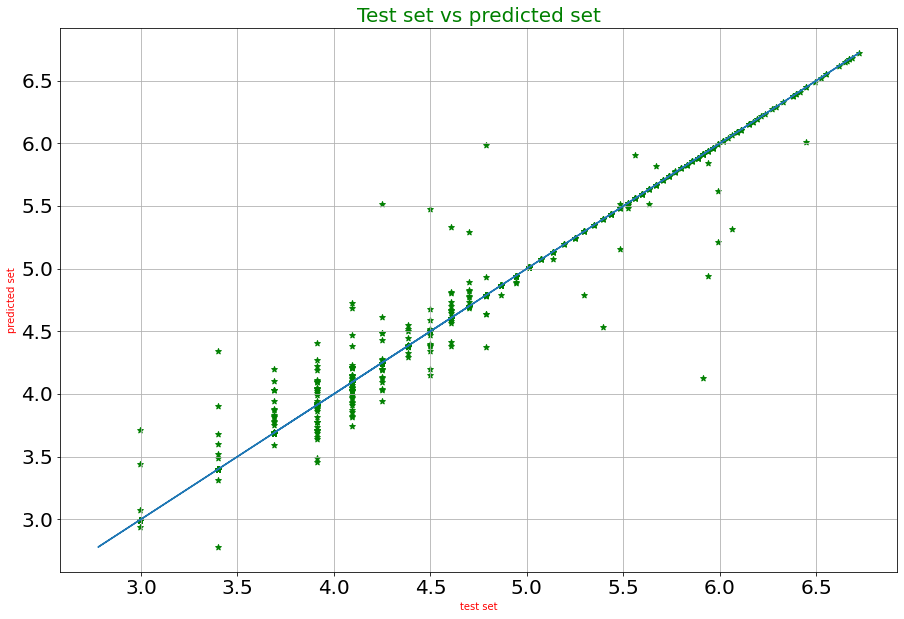

In [ ]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test,y_pred_test, color='green', marker='*')
plt.plot(y_pred_test, model3.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (15,10)
plt.grid()
plt.show()

### KNeighborsRegressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=41)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
start = time.time()
model4 = KNeighborsRegressor(n_neighbors=1, weights='uniform', algorithm='auto', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=None)
model4.fit(x_train, y_train)
end = time.time()
train_time = end - start
print('Training_Time:')
print(train_time)

Training_Time:
0.052398681640625


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=200)

In [ ]:
y_pred_test = model4.predict(x_test)
y_pred_train = model4.predict(x_train)

In [ ]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.9649109845831552
Test Score:0.9595484240200616
MAE:0.025215171864728592
MSE:0.017054779659609574
RMSE :  0.130594


In [ ]:
model4.score(x_test, y_test)

0.9595484240200616

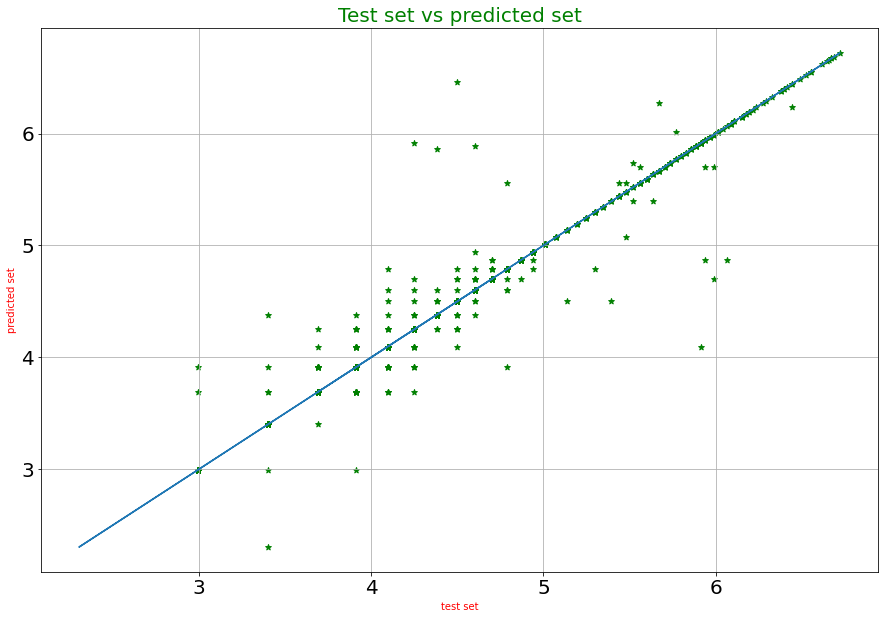

In [ ]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test,y_pred_test, color='green', marker='*')
plt.plot(y_pred_test, model4.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (15,10)
plt.grid()
plt.show()

### XGBRegressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=41)

In [ ]:
import xgboost as xg
start = time.time()
# Instantiation
model5 = xg.XGBRegressor(objective ='reg:linear',n_estimators = 450)
# Fitting the model
model5.fit(x_train, y_train)
end = time.time()
train_time = end - start
print('Training_Time:')
print(train_time)

[14:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training_Time:
5.7691919803619385


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=100)

In [ ]:
# Predict the model
y_pred_test = model5.predict(x_test)
y_pred_train = model5.predict(x_train)

In [ ]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.5915703744692224
Test Score:0.605285350895751
MAE:0.28022726223659344
MSE:0.16601357088516147
RMSE :  0.407448


In [ ]:
model5.score(x_test, y_test)

0.605285350895751

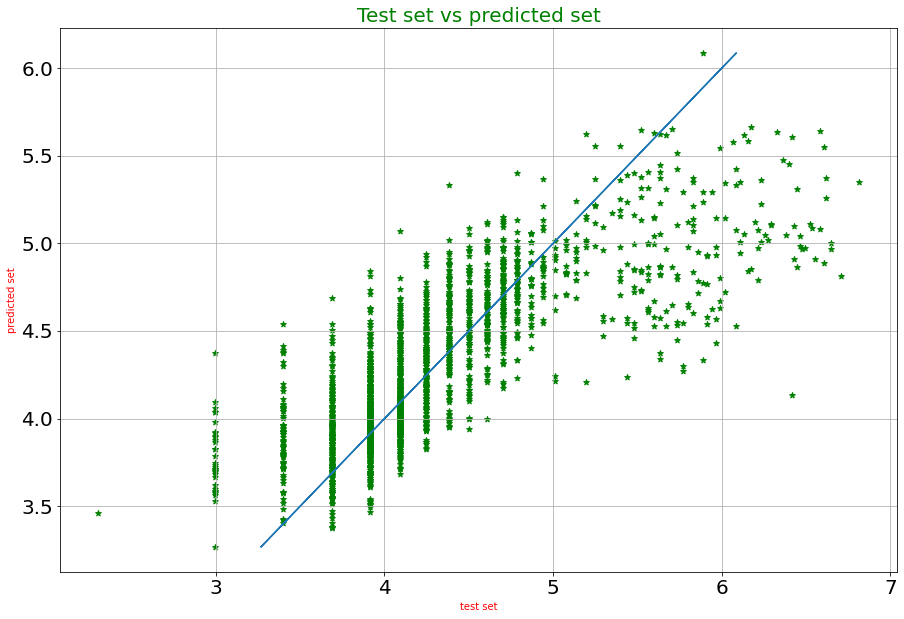

In [ ]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test,y_pred_test, color='green', marker='*')
plt.plot(y_pred_test, model5.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.show()

### Summarising the result

#### XGBRegressor : 
1. Training Time:8.966020822525024
2. Train Score:0.9342689986343483 
3. Test Score:0.9410170137349222 
4. MAE:0.10586207932024369 
5. MSE:0.02480773438117271  
6. RMSE :  0.157505 

#### RandomForestRegressor: 
1. Training Time: 29.131198406219482
2. Train Score:0.9411667013597079 
3. Test Score:0.9423143034751615 
4. MAE:0.09509836016294805 
5. MSE:0.024320853264904685 
6. RMSE :  0.155951 

#### DecisionTreeRegressor: 
1. Training Time: 0.40395402908325195
2. Train Score:0.9548686074623695 
3. Test Score:0.9496995361202017  
4. MAE:0.028897311000629148 
5. MSE:0.021207167025372713 
6. RMSE :  0.145627 

#### KNeighborsRegressor: 
1. Training Time: 0.13168883323669434
2. Train Score:0.9650204786674034 
3. Test Score:0.9585396154277893
4. MAE:0.0256793515667925 
5. MSE:0.01748010321853484 
6. RMSE :  0.132212

#### ExtreTreeRegressor: 
1. Training Time: 8.971089363098145
2. Train Score:0.9782578094542572 
3. Test Score:0.9760687750546259  
4. MAE:0.02000476253955391  
5. MSE:0.010089638253657189 
6. RMSE :  0.100447

### Observations from the four models(Linear Regression, Logistic Regresion, Decision Tree Regression, Random Forest Regression)
1. As we orderly move from XGBRegressor to ExtraTreeRegressor, test score changes from 46.3% to 97.6% 
2. ExtraTreeRegressor is the best model out of Five with more than 97.6% accuracy.  

###  Problem 9: Apply cross-validation techniques and does hyperparameter tuning to improve the model.

### Hyperparameter tuning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=41)

In [ ]:
# Specifying the hyperparameter values
from sklearn.model_selection import GridSearchCV
start = time.time()
param_grid = [{
              'max_depth': [20, 50, 80,100],
              'n_estimators' : [50,70,100,120],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=200)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 3, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(x_train, y_train)
end = time.time()
train_time = end - start
print('Training_Time:')
print(train_time)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Training_Time:
265.6587598323822


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=200)

In [ ]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 120}

In [ ]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=50, max_features='sqrt', n_estimators=120,
                    random_state=200)

In [ ]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(x_train,y_train)

0.9788146561016058

In [ ]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(x_test,y_test)

0.9788070745078566

In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(metrics.mean_squared_error(y_test, grid_search.best_estimator_.predict(x_test)))

0.09452589301351855

In [ ]:
y_pred_test = grid_search.predict(x_test)

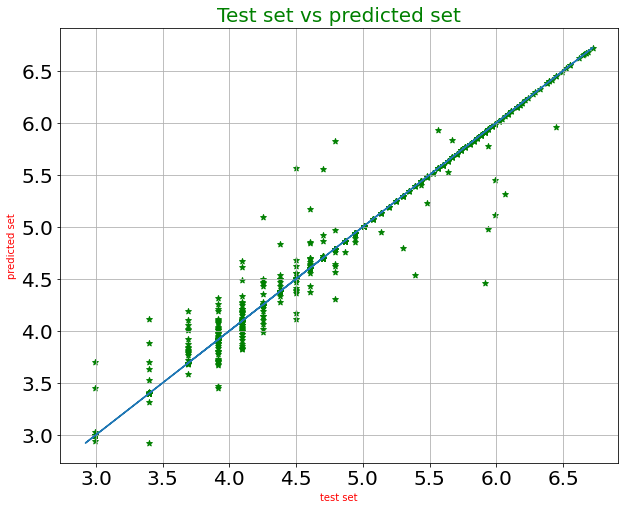

In [ ]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test,y_pred_test, color='green', marker='*')
plt.plot(y_pred_test, grid_search.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.show()

### Conclusion
The rmse value decreased from 0.100 to 0.094 and the model is enhanced from 97.6 to 97.88%. We have obtained the best possible model for our appliance energy dataset.

### Problem 10: Perform some predictions with input values(physical and temporal feautres) and compare with available output values(Appliance use). Finally deploy the model.

### Performing some predictions

In [ ]:
x_test.iloc[0:1,:]

,RH_out,Outside_build_humd,teen_room_humd,parent_room_humd,bathroom_temp,iron_room_temp,Office_room_temp,teen_room_temp,Kitchen_temp,Laundary_room_temp.,T_out,Outside_build_temp,Liv_room_temp,hour
5906,84.0,80.13,49.026667,46.79,18.6,18.29,21.666667,22.1,21.5,21.5,12.0,12.3,20.633333,17


In [ ]:
y_test.iloc[0:1,:]

,Appliances(Wh)
5906,4.70048


In [ ]:
x_test[0:1]

,RH_out,Outside_build_humd,teen_room_humd,parent_room_humd,bathroom_temp,iron_room_temp,Office_room_temp,teen_room_temp,Kitchen_temp,Laundary_room_temp.,T_out,Outside_build_temp,Liv_room_temp,hour
5906,84.0,80.13,49.026667,46.79,18.6,18.29,21.666667,22.1,21.5,21.5,12.0,12.3,20.633333,17


In [ ]:
# ExtraTreeRegressor without tuning
model3.predict([[84.0,80.13,49.026667,46.79,18.6,18.29,21.666667,22.1,21.5,21.5,12.0,12.3,20.633333,17]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([4.70048037])

In [ ]:
# ExtraTreeRegressor after  Hyperparameter tuning
grid_search.predict([[84.0,80.13,49.026667,46.79,18.6,18.29,21.666667,22.1,21.5,21.5,12.0,12.3,20.633333,17]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([4.70048037])

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Try yourself  (press shift+enter and input the values)

In [ ]:
x_test[100:101]

,RH_out,Outside_build_humd,teen_room_humd,parent_room_humd,bathroom_temp,iron_room_temp,Office_room_temp,teen_room_temp,Kitchen_temp,Laundary_room_temp.,T_out,Outside_build_temp,Liv_room_temp,hour
15463,95.833333,51.53,41.966667,36.433333,19.2,19.39,20.39,22.1,21.1,21.5,0.35,-0.2,17.89,2


In [ ]:
y_test[100:101]

,Appliances(Wh)
15463,4.094345


In [ ]:
a = int(input('Relative Humidity Outside(%):'))
b = int(input('Outside_build_humidity'))
c = int(input('teen_room_humidity'))
d = int(input('parent_room_humidity'))
e = int(input('bathroom_temperature'))
f = int(input('iron_room_humidity'))
g = int(input('Office Room Temperature(*celcius):'))
h = int(input('teen_room_temperature'))
i = int(input('Kitchen Temperature(*celcius):'))
j = int(input('Laundary_room_temperature'))
k = int(input('Temperature Outside(*celcius):'))
l = int(input('Outside_build_temperature'))
m = int(input('Living Room Temperature(*celcius):'))
n = int(input('Hour of day(24-format):'))

Relative Humidity Outside(%):95
Outside_build_humidity51
teen_room_humidity41
parent_room_humidity36
bathroom_temperature19
iron_room_humidity19
Office Room Temperature(*celcius):20
teen_room_temperature22
Kitchen Temperature(*celcius):21
Laundary_room_temperature21
Temperature Outside(*celcius):0
Outside_build_temperature-1
Living Room Temperature(*celcius):18
Hour of day(24-format):2


In [ ]:
list1 = [a,b,c,d,e,f,g,h,i,j,k,l,m,n]
x = model3.predict([list1])
print('Final Prediction:')
print(f'{x} Wh will be required for the apartment for the next 10 minutes')

Final Prediction:
[3.90969734] Wh will be required for the apartment for the next 10 minutes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------